# Employee Exit Surveys Analysis
In this project, we will work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) Institute in Queensland, Australia. The data can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) (the original TAFE exit data survey is no longer available).

The **GOALS** of our project are to answer these questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about the employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfation? What about older employees?

A data dictionary wasn't provided with the dataset. For this project, we will use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:
* `ID`: Id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's ended
* `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:
* `record_ID`: Id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

## 1. Exploring and Cleaning the Data
Let's start exploring our datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

### 1.1. DETE Survey Data

In [2]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In the `dete_survey` dataset, we have 822 rows and 56 columns. However we won't use all of the columns in this analysis, and focused only to the first four columns: `ID`, `SeparationType`, `Cease Date`, and `DETE Start Date`. The `Cease Date` and `DETE Start Date` are object they while they should be datetime type, we will convert them later.

In [3]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2014         2
07/2014         2
08/2012         2
04/2013         2
02/2014         2
11/2012         1
09/2010         1
2010            1
2014            1
07/2012         1
09/2014         1
07/2006         1
Name: Cease Date, dtype: int64

On `Cease Date` column, we found that there is no missing (NaN) value in the column. However, there are 34 entries of `Not Stated` value. We will treat them as missing values, and we have options what to do with them:
- Drop the rows with `Not Stated` values in `Cease Date` column.
- Replace with other value that approximately represent the data.
- Leave them as is.

First, we can use `pd.read_csv()` function to specify values that should be represented as `NaN`. In this process, we will also drop other columns that aren't useful to our analysis.

In [4]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],
                                      axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Now we have 35 columns instead of 56, and the `Not Stated` values have been replaced with `NaN` values.

### 1.2. TAFE Survey Data
Next, let's look at the TAFE dataset.

In [5]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe_survey['CESSATION YEAR'].value_counts(dropna=False)

2011.0    268
2012.0    235
2010.0    103
2013.0     85
NaN         7
2009.0      4
Name: CESSATION YEAR, dtype: int64

On TAFE dataset, we have 702 entries with 72 columns. And we know that missing values are already properly defined as `NaN`. However we noticed that most of the column names are long and will make our code writing difficul, we will simplify them.

Prior to that, we will drop the irrelevant columns first:

In [7]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### 1.4. Standardizing the Column Names
Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis.

|dete_survey|tafe_survey|Definition|
|:---------:|:---------:|:--------:|
|ID|Record ID|An id used to identify the prticipant of the survey|
|SeparationType|Reason for ceasing employment|The reason why the participant's employmeny ended|
|Cease Date|CESSATION YEAR|The year or month the participant's employment ended|
|DETE Start Date||The year the participant began employment with the DETE|
||LengthofServiceOverall.Overall Length of Service at Institute (in years)|the length of the person's employment (in years)|
|Age|CurrentAge.Current Age|The age of the participant|
|Gender|Gender.What is your Gender?|The gender of the participant|

Because later we will combine the two datasets, we'll have to standardize the column names. We can use the `DataFrame.columns` attribute along with vertorized string methods to update all of the columns at once.

In [8]:
# Renaming the DETE dataset
dete_survey_updated.columns = (dete_survey_updated.columns.
                              str.lower().str.strip().
                              str.replace(' ', '_'))

# Renaming the TAFE dataset
renaming = {'Record ID':'id', 'CESSATION YEAR':'cease_date',
            'Reason for ceasing employment':'separationtype',
            'Gender. What is your Gender?':'gender',
            'CurrentAge. Current Age':'age',
            'Employment Type. Employment Type':'employment_status',
            'Classification. Classification':'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
            'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
tafe_survey_updated.rename(renaming, axis=1, inplace=True)

In [9]:
# Checking the renamed DETE dataset
dete_survey_updated.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [10]:
# Checking the renamed TAFE dataset
tafe_survey_updated.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


### 1.5. Isolating the Data
We have renamed the columns that we'll use in our analysis. Next, let's remove more of the data we don't need.

In [11]:
print(dete_survey_updated['separationtype'].value_counts())
print('\n')
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who *resigned*, so their separation type contains the sring `Resignation`.

Note that `dete_survey_updated` dataframe contains multiple separation types with the string `Resignation`:
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

We will have to account for each of these variations so we don't unintentionally drop data!

In [12]:
# Isolate the TAFE dataframe which contains "Resignation" in separationtype column
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [13]:
# Isolate the TAFE dataframe which contains "Resignation" in separationtype column
pat = r"Resignation"
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(pat)].copy()

For the TAFE dataframe we only isolate the datapoints which values in the `separationtype` column **equal to** `Resignation`. In contrast, for the DETE dataframe we have to use regular expression (regex) to capture every value which **contains** string `Resignation`, regardless the characters followed after.

### 1.6. Checking for Wrong Data
In this step, we'll focus on verifying that the years in the `cease_date` and `date_start_date` columns to make sense.
- Since the `cease_date` is the last of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. if there are a small amount of values that are unrealistically high ir low, we can remove them.

In [14]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

As we can see, there are various formats written for the date. We will extract only the year and convert them to `float` type.

In [15]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype(float)

<AxesSubplot:>

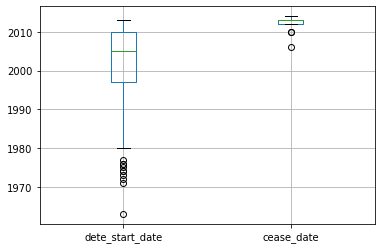

In [16]:
dete_resignations.boxplot(['dete_start_date', 'cease_date'])

We use boxplot to better visualizing the distribution of data in `dete_start_date` and `cease_date` columns. Most of the values of `dete_start_date` column are between year 1998 - 2010 and values of `cease_date` column are around 2002. However, we can see that there are some unreasonable values (before 1980 or cease date before 2010). The boxplot already exclude them and determine them as outliers, therefore they do not skew our data.

We conclude the data of `dete_start_date` and `cease_date` in DETE dataframe are **valid**.

For TAFE dataframe, we do not have information regarding the employment start date, but we have information on employment duration instead. So we only check on `cease_info` column.

In [17]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

There is no issue here, the year span seems reasonable. Next, we will standardize the column so that the DETE dataframe also has `institute_service` which contains the employment duration information.

In [18]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

### 1.7. Adding `dissatifaction` Data
Previously, we created a new `institute_service` column that we'll use to analyze survey respondents according to their length of employment. Next, we'll identify any emloyees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.
1. tafe_survey_updated:
    - `Contributing Factors. Dissatisfation`
    - `Contributing Factors. Job Dissatisfaction`
2. dete_survey_update:
    - `job_dissatisfaction`
    - `dissatisfaction_with_the_department`
    - `physical_work_environment`
    - `lack_of_recognition`
    - `lack_of_job_security`
    - `work_location`
    - `employment_conditions`
    - `work_life_balance`
    - `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column. In this code we will convert the values as `True`, `False`, and `NaN`.

#### TAFE Dataframe `dissatisfied` Column

In [19]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [20]:
# Convert the values in "Contributing Factors. Dissatisfaction" column into boolean
tafe_resignations.loc[tafe_resignations['Contributing Factors. Dissatisfaction']=='-',
                     'Contributing Factors. Dissatisfaction'] = False
tafe_resignations.loc[tafe_resignations['Contributing Factors. Dissatisfaction']=='Contributing Factors. Dissatisfaction ',
                     'Contributing Factors. Dissatisfaction'] = True

# Convert the values in "Contributing Factors. Job Dissatisfaction" column into boolean
tafe_resignations.loc[tafe_resignations['Contributing Factors. Job Dissatisfaction']=='-',
                     'Contributing Factors. Job Dissatisfaction'] = False
tafe_resignations.loc[tafe_resignations['Contributing Factors. Job Dissatisfaction']=='Job Dissatisfaction',
                     'Contributing Factors. Job Dissatisfaction'] = True

In [21]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64


False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


Now, we have values in two columns above as `True`, `False`, and `NaN`. Next we will add a new column `dissatisfied` which values is `True` if either column above has `True` value using `DataFrame.any()` method.

In [22]:
tafe_resignations['dissatisfied'] = (tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].
                                     any(axis=1, skipna=True))

In [23]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'dissatisfied']].value_counts(dropna=False)

Contributing Factors. Dissatisfaction  Contributing Factors. Job Dissatisfaction  dissatisfied
False                                  False                                      False           241
                                       True                                       True             36
True                                   False                                      True             29
                                       True                                       True             26
NaN                                    NaN                                        False             8
dtype: int64

We have a column in TAFE dataframe which summarized the dissatisfaction level as True, False, and NaN values. We will implement the same process for DETE dataframe.

#### DETE Dataframe `dissatisfied` Column

In [24]:
dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment',
                  'lack_of_recognition', 'lack_of_job_security', 'employment_conditions',
                  'employment_conditions', 'work_life_balance', 'workload']]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,employment_conditions,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,True,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
808,False,False,False,False,False,False,False,False,False
815,False,False,False,False,False,False,False,False,False
816,False,False,False,False,False,False,False,False,False
819,False,False,False,False,False,False,False,True,False


Since the required columns are already contain boolean values, we don't need to process them and we can directly create the `dissatisfaction` column using `DataFrame.any()` method. 

In [25]:
dete_resignations['dissatisfied'] = (dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department',
                                                           'physical_work_environment', 'lack_of_recognition',
                                                           'lack_of_job_security', 'employment_conditions',
                                                           'employment_conditions', 'work_life_balance', 'workload']].
                                       any(axis=1, skipna=True))

In [26]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    170
True     141
Name: dissatisfied, dtype: int64

### 1.8. Combining the Two Dataframes
We're finally ready to combine our datasets!. We want to aggregate the data according to the new column `institute_service`.

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

In [27]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

Then we combine the two dataset using `pd.concat()` function along the index (axis = 0).

In [28]:
combined = pd.concat([dete_resignations, tafe_resignations],
                    ignore_index=True)

combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Recall that we still have some columns left in the dataframe that we don't need to complete our analysis. We will use `DataFrame.dropna()` method to drop any columns with less than 500 non null values.

In [29]:
combined_updated = combined.dropna(axis=1, thresh=500)

In [30]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 46.5+ KB


### 1.9. Categorizing the `institute_service` Column
Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis. First, though, we'll have to clean up the `institute_service` column. This column is tricky to clean because it currently contains values in a couple different forms.

In [31]:
combined_updated['institute_service'].value_counts(dropna=False).head(10)

NaN                 88
Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
11-20               26
5.0                 23
1.0                 22
7-10                21
3.0                 20
Name: institute_service, dtype: int64

To analyze the data, we'll convert these numbers into categories. We'll base our analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

Let's categorize the values in the `institute_service` column using the definitions above.

In [32]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
combined_updated['institute_service_up'].value_counts(dropna=False).sort_index()

C:\Users\580588\AppData\Local\Temp/ipykernel_13052/2246288414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
C:\Users\580588\AppData\Local\Temp/ipykernel_13052/2246288414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')


0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
NaN      88
Name: institute_service_up, dtype: int64

Next, we'll build a function to map each value to one of the career stage definitions above.

In [33]:
def career_stage(val):
    if (pd.isnull(val)):
        return np.nan
    elif (val < 3):
        return 'New'
    elif (val >= 3) and (val <= 6):
        return 'Experienced'
    elif (val >= 7) and (val <= 10):
        return 'Established'
    elif (val >= 11):
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(career_stage)
combined_updated['service_cat'].value_counts(dropna=False)

C:\Users\580588\AppData\Local\Temp/ipykernel_13052/212788565.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(career_stage)


New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## 2. Analyzing the Data
Now, let's finally do our first piece of analysis! but note that we still have additional missing values left to deal with. This is meant to be an initial introduction to the analysis, *not* the final analysis.

Recall that the `dissatisfied` column consists of Boolean values, meaning they're either `True` or `False`. Methods such as the `df.pivot_table()` actually treat Boolean values as integers, so a `True` value is considered to be `1` and a `False` value is considered to be `0`. That means that we can aggregate the `dissatisfied` column and calculate the number of people in each group, the percentage of people in each group, etc.

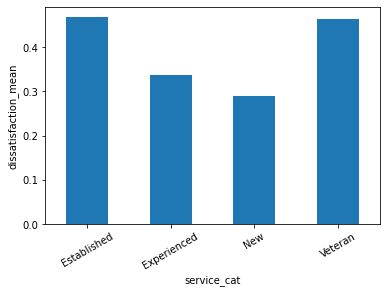

In [34]:
%matplotlib inline
combined_updated.pivot_table('dissatisfied','service_cat').plot(kind='bar', rot=30, legend=False, ylabel='dissatisfaction_mean')
plt.show()

To be continued . . .